# Costi Riscossione Tributi

Questa analisi ha come obiettivo approfondire come i costi per **la riscossione dei tributi** si distribuisce in Italia. In particolare:
- Analizzeremo la sua distribuzione normalizzata per il numero di contribuenti per le varie Regioni.
- Cercheremo di capire quali sono le top/last regioni/province/comuni per spesa riscossione tributi

In [244]:
import numpy as np
import pandas as pd

# set the max number of columns to display
pd.options.display.max_columns = 98

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import plotly.offline as py
import plotly.plotly as py_on
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected=True)

from IPython.display import Image
from IPython.display import display

Il dataset preso in analisi contiene informazioni sui **costi riscossione tributi per 2010-2013 (OpenCivitas)**  e i **redditi dei contribuenti (Mef dati Irpef)** per lo stesso periodo. In totale abbiamo 26800 osservazioni distribuite per anno:

In [452]:
fattore = 'SPESA_CCC_FC01A'
fattore_descrizione = 'Costo Riscossione Tributi'

tot_contribuenti = 'tot_contribuenti'

fattore_normalizzato = 'spesa_tributi_per_contribuenti'

In [246]:
df = pd.read_csv('./data/opencivitas_spesa_storica_dati_irpef.csv')
df.shape

(26799, 86)

Distribuzione delle osservazioni Anno e Comuni per cui abbiamo rilevazioni per l'anno in questione.

In [247]:
df.groupby(['ANNO'])[fattore].count()

ANNO
2010    6702
2011    6699
2012    6699
2013    6699
Name: SPESA_CCC_FC01A, dtype: int64

Aggiungiamo ora la colonna per il fattore di analisi normalizzato per numero di contribuenti

In [248]:
df[fattore_normalizzato]= df[fattore] / df[tot_contribuenti]

In [249]:
df[fattore_normalizzato].head()

0     9.135789
1     0.233289
2    20.696801
3     6.788800
4    38.156980
Name: spesa_tributi_per_contribuenti, dtype: float64

-----------------------

In [250]:
df_regione = df.groupby(df.Regione)[fattore_normalizzato].mean()
df_regione = df_regione.sort_values(ascending=False)

In [251]:
data_pie = [
    go.Pie(labels = df_regione.index, values=df_regione),
]

layout_pie = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro'
)

fig_pie = go.Figure(data=data_pie, layout=layout_pie)

data_bar = [
    go.Bar(x=df_regione.index, y=df_regione, name = 'spesa media')
]

layout_bar = go.Layout(
    title='Costo medio riscossione tasse per Regione/Contribuente in Euro',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Euro per Contribuente',
    )
)

fig_bar = go.Figure(data=data_bar, layout=layout_bar)

## Costo Riscossione Tributi per Regione

Per prima cosa analizziamo quali sono le regioni che hanno maggiori costi per la riscossione delle tasse.
Possiamo osservare che per il periodo 2010-2013 la Liguria sia la regione con li maggior costo procapite per la riscossione dei tributi. La tabella sotto mostra il dettaglio dei costi. 

Mentre, il grafico a torta fa vedere la distribuzione percentuale di questi costi sul totale delle regioni presenti nel dataset.

In [252]:
df_regione

Regione
LIGURIA           25.526999
TOSCANA           20.985320
LAZIO             19.517032
UMBRIA            19.375336
ABRUZZO           18.305063
CALABRIA          18.206965
PUGLIA            17.903016
CAMPANIA          17.685549
LOMBARDIA         17.559752
PIEMONTE          16.195326
MOLISE            16.000031
EMILIA-ROMAGNA    15.782949
BASILICATA        15.120855
MARCHE            14.989963
VENETO            12.686208
Name: spesa_tributi_per_contribuenti, dtype: float64

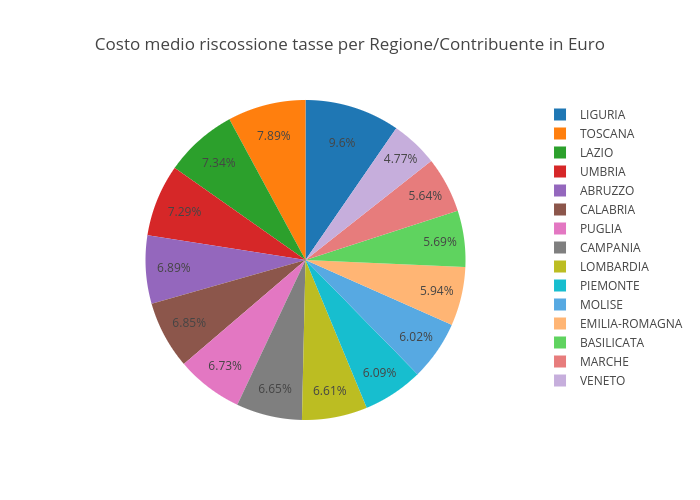

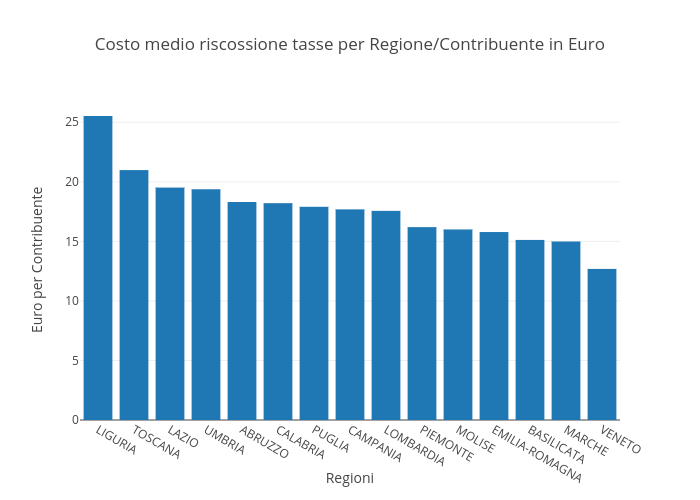

In [253]:
py.iplot(fig_pie)
py.iplot(fig_bar)

fig_pie_path = 'imgs/tributi_regione_pie.png'
fig_bar_path = 'imgs/tributi_regione_bar.png'

py_on.image.save_as(fig_pie, filename=fig_pie_path)
py_on.image.save_as(fig_bar, filename=fig_bar_path)

x = Image(fig_pie_path)
y = Image(fig_bar_path)
display(x,y)

## Dettaglio Riscossione Tributi Puglia, Campania e Lombardia 

E' interessante notare come Puglia, Campania e Lombardia abbiano un costo di riscossione molto simile. Andiamo a dettagliare questi dati rispetto al totale costi e al numero di persone per avere una idea. 
Inoltre, possiamo incrociare questi dati con i dati Irpef per capire quali sono le fasce di reddito che contribuiscono maggiormente agli introiti di cassa delle regioni.


In [254]:
# mediamo sul numero degli anni in analisi
df_regione_sum = df.groupby(df.Regione).sum() / 4

fattori_analisi = [fattore, tot_contribuenti]
regioni_interesse = ['PUGLIA','LOMBARDIA','CAMPANIA']

df_tributi_contribuenti = df_regione_sum[fattori_analisi]

df_regioni_interesse = df_tributi_contribuenti.loc[regioni_interesse,:]
df_regioni_interesse = df_regioni_interesse.sort_values(tot_contribuenti, ascending=False)

In [255]:
data = [
    go.Bar(x=df_regioni_interesse.index, y=df_regioni_interesse[fattore], name='costo riscossione tributi'),
    go.Bar(x=df_regioni_interesse.index, y=df_regioni_interesse[tot_contribuenti], name='numero contribuenti'),  
]

layout = go.Layout(
    title='Costo totale riscossione tributi e numero contribuenti',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Totale Costi - numero contribuenti',
    )
)
fig = go.Figure(data=data, layout=layout)

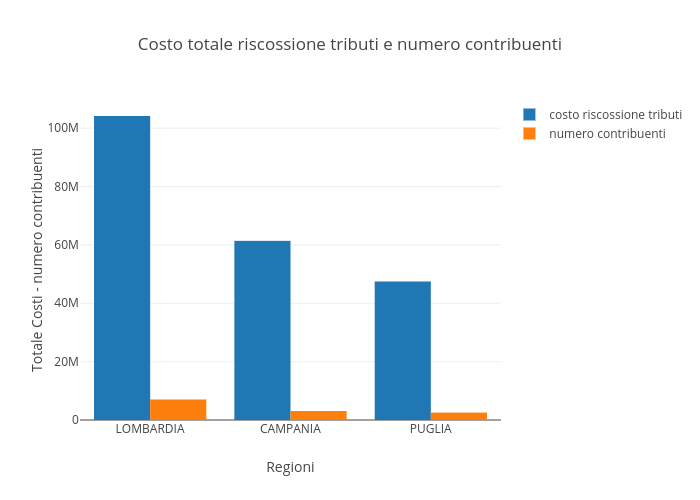

In [256]:
py.iplot(fig)

fig_path = 'imgs/totale_riscossione_tributi.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)

>Andiamo ad analizzare in dettaglio il numero dei contribuenti nelle Regioni considerate.
Se confrontiamo questo valore con la popolazione residente, possiamo avere una idea della percentuale della popolazione che dichiara introiti.

|   |   |   |   |
|---|---|---|---|
| LOMBARDIA  |  7026749  | 10000000 | 70.2% |
| CAMPANIA   |  3085606  |  5869000 | 52.5% |
| PUGLIA     |  2541365  |  4087000 | 62.1% |


### Distribuzione Redditi

Analizziamo ora come sia distribuita la contribuzione fiscale da parte dei contribuenti.
In particolare, analizziamo le diverse fonti di reddito dal punto di vista di:

1. distribuzione contribuenti
2. distribuzione introiti

Qui sotto consideriamo quali sono i fattori per l'analisis:

In [448]:
fattori = [c for c in df.columns.values if c.startswith('Reddito') and 'Frequenza' in c]
fattori

['Reddito complessivo da 0 a 10000 euro Frequenza',
 'Reddito complessivo da 10000 a 15000 euro Frequenza',
 'Reddito complessivo da 15000 a 26000 euro Frequenza',
 'Reddito complessivo da 26000 a 55000 euro Frequenza',
 'Reddito complessivo da 55000 a 75000 euro Frequenza',
 'Reddito complessivo da 75000 a 120000 euro Frequenza',
 'Reddito complessivo oltre 120000 euro Frequenza',
 'Reddito da fabbricati Frequenza',
 'Reddito da lavoro dipendente e assimilati Frequenza',
 'Reddito da pensione Frequenza',
 'Reddito imponibile Frequenza',
 'Reddito imponibile addizionale Frequenza',
 'Reddito imponibile addizionale IRPEF Frequenza',
 'Reddito lavoro autonomo Frequenza',
 'Reddito da partecipazione Frequenza',
 'Reddito imprenditore ordinario Frequenza',
 'Reddito imprenditore semplificata Frequenza',
 'Reddito minore o uguale a zero Frequenza']

Dai quali selezioniamo i redditi da lavoro

In [461]:
frequenza_reddito_scaglioni = [
 ('Regione','Reddito minore o uguale a zero Frequenza', '0M'),
 ('Regione','Reddito complessivo da 0 a 10000 euro Frequenza', '0-10M'),
 ('Regione','Reddito complessivo da 10000 a 15000 euro Frequenza', '10-15M'),
 ('Regione','Reddito complessivo da 15000 a 26000 euro Frequenza', '15-26M'),
 ('Regione','Reddito complessivo da 26000 a 55000 euro Frequenza', '26-55M'),
 ('Regione','Reddito complessivo da 55000 a 75000 euro Frequenza', '55-75M'),
 ('Regione','Reddito complessivo da 75000 a 120000 euro Frequenza', '75-120M'),
 ('Regione','Reddito complessivo oltre 120000 euro Frequenza', '>120M'),
]

fattori_frequenza = [v for _, v, _ in frequenza_reddito_scaglioni]

### Frequenza contribuenti per fascia economica

L'istogramma e la tabella sotto mostra la frequenza di contribuenti per fascia di reddito.
Inoltre, di seguito viene mostrata la stessa quantita' in valore percentuale. Questo serve a vedere la contribuzione delle varie fasce di reddito per Regione di interesse.

In [450]:
df_regioni_redditi

,Regione,Reddito minore o uguale a zero Frequenza,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo oltre 120000 euro Frequenza
0,PUGLIA,15367.00,1073089.75,425018.50,625407.25,346242.25,27648.25,21324.0,7268.25
1,LOMBARDIA,25850.75,1702869.50,961101.25,2453115.75,1492139.25,183338.00,133898.0,74437.00
2,CAMPANIA,21650.25,1282767.00,456838.50,768737.00,473826.75,40073.50,31498.5,10214.75


### Contribuzione per fascia di reddito in percentuale

In [462]:
frequenza_redditi_percentuale = df_regione_sum.loc[regioni_interesse,fattori_frequenza].reset_index()
tot_contribuenti_regione = df_regione_sum.loc[regioni_interesse,tot_contribuenti].reset_index()

frequenza_redditi_percentuale[fattori_frequenza] = frequenza_redditi_percentuale[fattori_frequenza].div(
    tot_contribuenti_regione[tot_contribuenti], axis='index')
frequenza_redditi_percentuale

,Regione,Reddito minore o uguale a zero Frequenza,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo oltre 120000 euro Frequenza
0,PUGLIA,0.006047,0.422249,0.167240,0.246091,0.136243,0.010879,0.008391,0.002860
1,LOMBARDIA,0.003679,0.242341,0.136778,0.349111,0.212351,0.026091,0.019055,0.010593
2,CAMPANIA,0.007017,0.415726,0.148055,0.249136,0.153560,0.012987,0.010208,0.003310


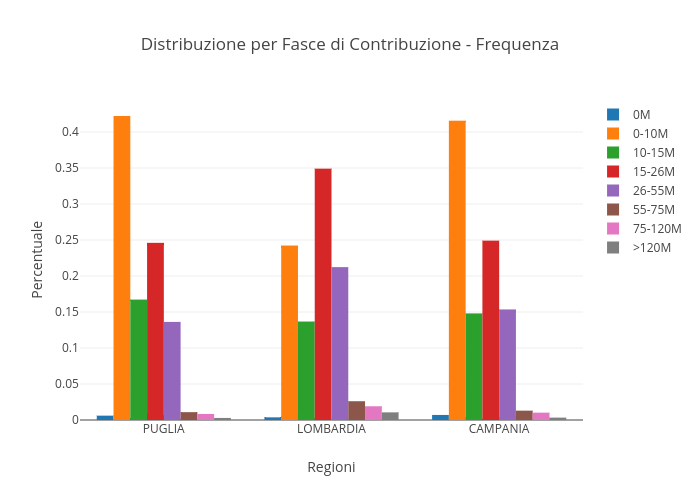

In [540]:
data_frequenza = []
for x,y,name in fattori_reddito_scaglioni:
    bar = go.Bar(
        x = frequenza_redditi_percentuale[x],
        y = frequenza_redditi_percentuale[y],
        name = name
    )
    data_frequenza.append(bar)

layout = go.Layout(
    title='Distribuzione per Fasce di Contribuzione - Frequenza',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Percentuale',
    )
)

fig = go.Figure(layout=layout, data=data_frequenza)
py.iplot(fig)

fig_path = 'imgs/percentuale_contribuenti_reddito.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)

Da questo grafico si puo' osservare come la Lombardia abbian una distribuzione spostata verso le alte fasce di contribuzione. Di seguito confrontiamo questo grafico con uno relativo alla contribuzione in termini di **Ammontare** di} denaro.

In [541]:
ammontare_reddito_scaglioni = [
 ('Regione','Reddito minore o uguale a zero Ammontare', '0M'),
 ('Regione','Reddito complessivo da 0 a 10000 euro Ammontare', '0-10M'),
 ('Regione','Reddito complessivo da 10000 a 15000 euro Ammontare', '10-15M'),
 ('Regione','Reddito complessivo da 15000 a 26000 euro Ammontare', '15-26M'),
 ('Regione','Reddito complessivo da 26000 a 55000 euro Ammontare', '26-55M'),
 ('Regione','Reddito complessivo da 55000 a 75000 euro Ammontare', '55-75M'),
 ('Regione','Reddito complessivo da 75000 a 120000 euro Ammontare', '75-120M'),
 ('Regione','Reddito complessivo oltre 120000 euro Ammontare', '>120M'),
]

ammontare_fattori = [v for _, v, _ in ammontare_reddito_scaglioni]

In [542]:
ammontare_redditi_percentuale = df_regione_sum.loc[regioni_interesse,ammontare_fattori].reset_index()
redditi_tot = df_regione_sum.loc[regioni_interesse, ammontare_fattori].sum(axis=1).reset_index()

ammontare_redditi_percentuale[ammontare_fattori]= redditi_interesse[ammontare_fattori].div(
    redditi_tot[0], axis='index'
)
ammontare_redditi_percentuale

,Regione,Reddito minore o uguale a zero Ammontare,Reddito complessivo da 0 a 10000 euro Ammontare,Reddito complessivo da 10000 a 15000 euro Ammontare,Reddito complessivo da 15000 a 26000 euro Ammontare,Reddito complessivo da 26000 a 55000 euro Ammontare,Reddito complessivo da 55000 a 75000 euro Ammontare,Reddito complessivo da 75000 a 120000 euro Ammontare,Reddito complessivo oltre 120000 euro Ammontare
0,PUGLIA,-0.004537,0.126601,0.133957,0.317203,0.297265,0.044989,0.049745,0.034776
1,LOMBARDIA,-0.001618,0.052239,0.074283,0.302725,0.318636,0.071417,0.075530,0.106788
2,CAMPANIA,-0.004377,0.122194,0.112185,0.304152,0.317598,0.050845,0.056988,0.040415


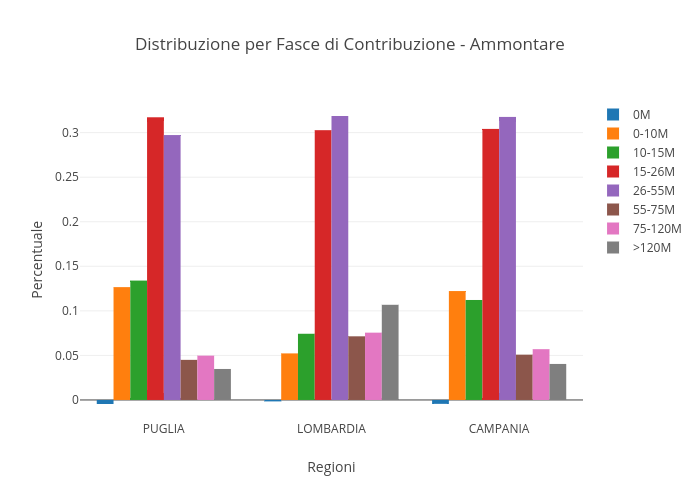

In [543]:
data_ammontare = []
for x,y,name in ammontare_reddito_scaglioni:
    bar = go.Bar(
        x = ammontare_redditi_percentuale[x],
        y = ammontare_redditi_percentuale[y],
        name = name
    )
    data_ammontare.append(bar)

layout = go.Layout(
    title='Distribuzione per Fasce di Contribuzione - Ammontare',
    xaxis=dict(
        title='Regioni',
    ),
    yaxis=dict(
        title='Percentuale',
    )
)

fig = go.Figure(layout=layout, data=data_ammontare)
py.iplot(fig)

fig_path = 'imgs/percentuale_contribuenti_reddito_ammontare.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)


# figs = tools.make_subplots(rows=1, cols=2, shared_xaxes=True, shared_yaxes=True)
# for d in data_frequenza:
#     figs.append_trace(d,1,1)
# for d in data_ammontare:
#     figs.append_trace(d,1,2)   

# py.iplot(figs)

In [535]:
ammontare_redditi_percentuale

,Regione,Reddito minore o uguale a zero Ammontare,Reddito complessivo da 0 a 10000 euro Ammontare,Reddito complessivo da 10000 a 15000 euro Ammontare,Reddito complessivo da 15000 a 26000 euro Ammontare,Reddito complessivo da 26000 a 55000 euro Ammontare,Reddito complessivo da 55000 a 75000 euro Ammontare,Reddito complessivo da 75000 a 120000 euro Ammontare,Reddito complessivo oltre 120000 euro Ammontare
0,PUGLIA,-0.004537,0.126601,0.133957,0.317203,0.297265,0.044989,0.049745,0.034776
1,LOMBARDIA,-0.001618,0.052239,0.074283,0.302725,0.318636,0.071417,0.075530,0.106788
2,CAMPANIA,-0.004377,0.122194,0.112185,0.304152,0.317598,0.050845,0.056988,0.040415



Per avere una visione comparabile delle voci di reddito possiamo analizzarle anche sotto forma di:
- line chart
- box plot

#### Line Chart


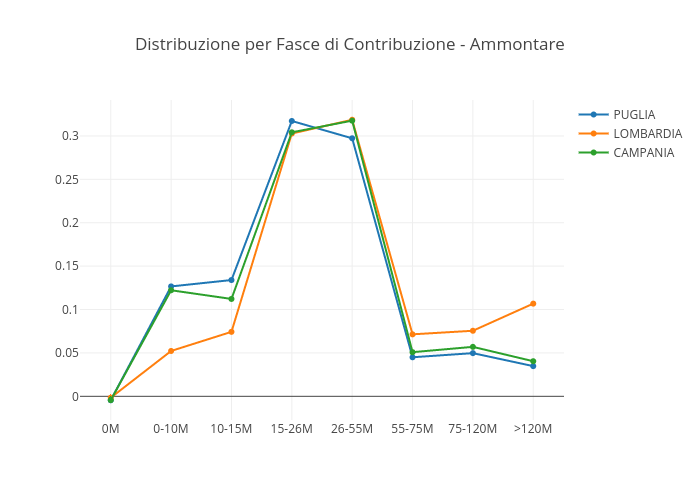

In [545]:
trasposta = ammontare_redditi_percentuale.T
trasposta.columns = trasposta.iloc[0]
trasposta = trasposta.iloc[1:,:]

columns_dict = {d:v for _, d, v in ammontare_reddito_scaglioni}
line_x = [columns_dict[k] for k in trasposta.index]
line_x

line_data = []
for c in trasposta:
    data = trasposta[c].values
    line_data.append(
        go.Scatter(x=line_x,y=data, name=c)
    )

layout = go.Layout(
    title='Distribuzione per Fasce di Contribuzione - Ammontare'
)
    
fig = go.Figure(layout=layout, data=line_data)
py.iplot(fig)

fig_path = 'imgs/percentuale_contribuenti_reddito_line.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)


#### Box Plot

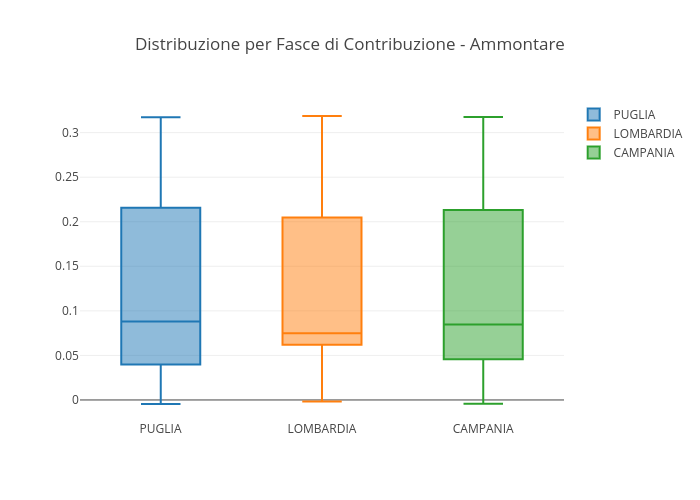

In [547]:
line_data = []
for c in trasposta:
    data = trasposta[c].values
    line_data.append(
        go.Box(y=data, name=c)
    )

layout = go.Layout(
    title='Distribuzione per Fasce di Contribuzione - Ammontare'
)
    
fig = go.Figure(layout=layout, data=line_data)
py.iplot(fig)

fig_path = 'imgs/percentuale_contribuenti_reddito_box.png'
py_on.image.save_as(fig, filename=fig_path)
x = Image(fig_path)
display(x)


Da qui possiamo vedere ancora meglio come la Lombardia abbia una distruzione diversa da quelle di Puglia e Campania.

## Confronto Liguria e Veneto

A questo punto sembra interessante controntare la Liguria e il Veneto per capire da cosa possa derivare una cosi' grande discrepanza.